In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = tf.cast(x_train, tf.float32) / 255
y_train = tf.cast(y_train, tf.int32)
x_test = tf.cast(x_test, tf.float32) / 255
y_test = tf.cast(y_test, tf.int32)

In [5]:
tf.reduce_max(x_train), tf.reduce_min(x_test)

(<tf.Tensor: id=13, shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: id=15, shape=(), dtype=float32, numpy=0.0>)

In [6]:
x_train.shape, x_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

In [7]:
x_train = tf.expand_dims(x_train, axis=-1)

In [8]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [9]:
x_test = tf.expand_dims(x_test, axis=-1)

In [10]:
x_test.shape

TensorShape([10000, 28, 28, 1])

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 633us/sample - loss: 0.1872 - acc: 0.9423
Epoch 2/5
60000/60000 [==============================] - 37s 623us/sample - loss: 0.0533 - acc: 0.9830
Epoch 3/5
60000/60000 [==============================] - 38s 627us/sample - loss: 0.0380 - acc: 0.9882
Epoch 4/5
60000/60000 [==============================] - 37s 613us/sample - loss: 0.0300 - acc: 0.9901
Epoch 5/5
60000/60000 [==============================] - 36s 599us/sample - loss: 0.0233 - acc: 0.9927


In [15]:
import matplotlib.pyplot as plt

In [16]:
sample = x_test[0]
sample = tf.reshape(sample, [28,28])

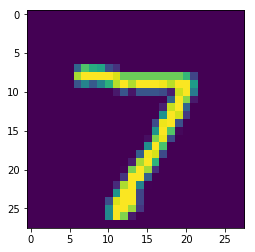

In [17]:
plt.imshow(sample)

In [19]:
p = x_test[0]
p = tf.reshape(p, [1,28,28,1])
prob = model.predict(p)
pred = tf.argmax(prob, axis=1)

In [20]:
pred.numpy()

array([7], dtype=int64)

In [23]:
tess_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [24]:
tess_loss, test_acc

(0.027829315967473303, 0.9915)